# Building and Evaluating a Linear Regression Model Using Machine Learning

In [1]:
import pandas as pd
import seaborn as sns


In [2]:
insurance_data= pd.read_csv("insurance.csv")

In [3]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#data preprocessing


<Axes: xlabel='bmi', ylabel='charges'>

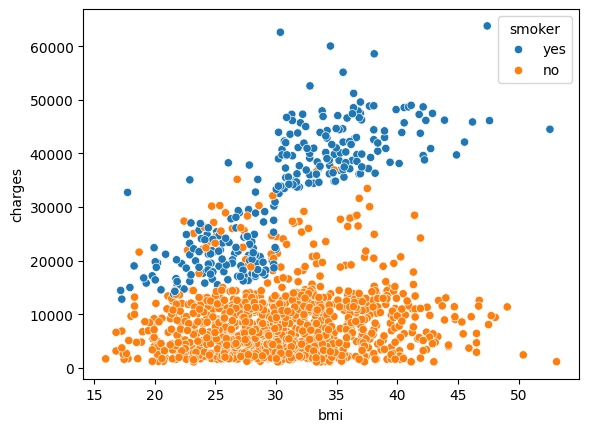

In [5]:
# visualize
sns.scatterplot(x=insurance_data["bmi"],
               y=insurance_data["charges"],
                hue=insurance_data["smoker"])#hue tell us who is smoker and who not


In [6]:
# here some columns droping uing drop fun
X=insurance_data.drop(columns=["charges","region"])
y=insurance_data["charges"]
X["sex"]=X["sex"].map({"female":1,"male":0})# mapping using map fun  m for 0,f for 1
X["smoker"]=X["smoker"].map({"yes":1,"no":0})# mapping using map fun  yes for 1,no for 0

In [7]:
X.head()

,age,sex,bmi,children,smoker
0,19,1,27.900,0,1
1,18,0,33.770,1,0
2,28,0,33.000,3,0
3,33,0,22.705,0,0
4,32,0,28.880,0,0


In [8]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [9]:
import sklearn

In [10]:
#1st step of ml :-that is train test split the data
# import or copy pad from website 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42)

In [11]:
X_test.head()

,age,sex,bmi,children,smoker
764,45,1,25.175,2,0
887,36,1,30.020,0,0
890,64,1,26.885,0,1
1293,46,0,25.745,3,0
259,19,0,31.920,0,1


In [12]:
X_train.head()

,age,sex,bmi,children,smoker
560,46,1,19.95,2,0
1285,47,1,24.32,0,0
1142,52,1,24.86,0,0
969,39,1,34.32,5,0
486,54,1,21.47,3,0


In [13]:
# TRAIN THE MODEL

In [14]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)# with fit we are tarin the model

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [15]:
# using this train model to predict values

y_pred=model.predict(X_test)

In [16]:
y_pred

array([ 8554.81711589,  6973.58746745, 36798.60416104,  9417.88282303,
       26871.68031081, 11097.38383938,   145.27608963, 16746.1683771 ,
         747.53414191, 11153.67590722, 28518.15016561,  9292.18345421,
        5460.51975119, 38510.48013003, 40359.30938604, 37223.40538064,
       15316.56711945, 36047.50032223,  9326.29049907, 31400.1559532 ,
        4269.64414373, 10464.66374097,  2719.9260555 ,  6579.53742551,
       11232.00255515, 12472.06793446, 14807.11281089,  6066.19283362,
        9535.69029723,  2377.6983797 ,  9475.05690885, 12963.23366722,
        4706.09057393,  3414.674504  ,  4815.64981654, 12484.17176954,
        2359.13614479,  9161.02061228, 33238.67621442, 32743.41702445,
        4274.58967205,  4229.5442107 , 14435.36485176, 11384.66898976,
        8925.70468583, 12480.09178788,  5154.45787816,  3554.10047649,
       35649.60942684,  9276.25523701, 15971.35991397,  2552.75200479,
       12162.99980138,  1062.65132285, 13551.43771934, 12103.65505529,
      

In [17]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [18]:
# evalution

In [19]:
# using r2_score
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("r-squared:",r2)

r-squared: 0.7811302113434097


In [20]:
#Adjusted R²

In [21]:
from sklearn.metrics import r2_score

r2=r2_score(y_test,y_pred)
print("r-squared:",r2)

n=X_test.shape[0]
p=X_test.shape[1]

adjusted_r2=1-((1-r2)*(n-1)/(n-p-1))
print("adjusted_r2-squared:",adjusted_r2)

r-squared: 0.7811302113434097
adjusted_r2-squared: 0.7769533069797343


In [22]:
X_test.shape

(268, 5)

# 📌 Feature Engineering 

## endcoding Feature Engineering 
### 1.one hot endcoding

In [23]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
# one hot endcoding
X=insurance_data.drop(columns=["charges"])
y=insurance_data["charges"]

X=pd.get_dummies(X,columns=["region"],drop_first=True,dtype=int) #drop_first=False:-Remove one category column on purpose to avoid confusion in the model.

X["sex"]=X["sex"].map({"female":1,"male":0})
X["smoker"]=X["smoker"].map({"yes":1,"no":0})

In [25]:
X.sample(10)

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
149,19,0,28.400,1,0,0,0,1
384,44,0,22.135,2,0,0,0,0
1160,43,1,34.580,1,0,1,0,0
844,53,0,30.495,0,0,0,0,0
55,58,0,36.955,2,1,1,0,0
736,37,1,38.390,0,1,0,1,0
810,46,1,30.800,3,0,0,0,1
1018,54,1,35.815,3,0,1,0,0
833,58,0,34.390,0,0,1,0,0
428,21,1,16.815,1,0,0,0,0


In [26]:
X.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,1
1,18,0,33.770,1,0,0,1,0
2,28,0,33.000,3,0,0,1,0
3,33,0,22.705,0,0,1,0,0
4,32,0,28.880,0,0,1,0,0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42)


model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

r2=r2_score(y_test,y_pred)
print("r2 score:",r2)

r2 score: 0.7835929767120724


In [28]:
# interaction feature



In [29]:
# Separate features and target
X = insurance_data.drop(columns=["charges"])
y = insurance_data["charges"]

# One-hot encoding for region
X = pd.get_dummies(X, columns=["region"], drop_first=True, dtype=int)

# Binary encoding
X["sex"] = X["sex"].map({"female": 1, "male": 0})
X["smoker"] = X["smoker"].map({"yes": 1, "no": 0})

# Interaction features (IMPORTANT FIX)
X["age_smoker"] = X["age"] * X["smoker"]
X["bmi_smoker"] = X["bmi"] * X["smoker"]


In [30]:
X.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest,age_smoker,bmi_smoker
0,19,1,27.900,0,1,0,0,1,19,27.9
1,18,0,33.770,1,0,0,1,0,0,0.0
2,28,0,33.000,3,0,0,1,0,0,0.0
3,33,0,22.705,0,0,1,0,0,0,0.0
4,32,0,28.880,0,0,1,0,0,0,0.0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42)


model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


r2=r2_score(y_test,y_pred)
print("r2 score:",r2)

r2 score: 0.865231697953168


In [32]:
# scaling numeric feature :salary val lakha on that case :-normalization and stadardaizition
# feature selection :-score ,study hours



In [33]:
# undertfitting and overfitting 

In [34]:
# r2 taining is low and r2 testing also low -underfit
# r2 taining is high >> and r2 testing also low -overfit

y_pred=model.predict(X_train)
r2_train=r2_score(y_train,y_pred)

print("training data r2:",r2_train)
print("test data r2:",r2)




training data r2: 0.8340713711218875
test data r2: 0.865231697953168
